In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [26]:
databaseWaveform = pd.read_csv("data/Waveform/Waveform.csv", encoding="utf-8")
databaseWaveform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5000 non-null   float64
 1   x2      5000 non-null   float64
 2   x3      5000 non-null   float64
 3   x4      5000 non-null   float64
 4   x5      5000 non-null   float64
 5   x6      5000 non-null   float64
 6   x7      5000 non-null   float64
 7   x8      5000 non-null   float64
 8   x9      5000 non-null   float64
 9   x10     5000 non-null   float64
 10  x11     5000 non-null   float64
 11  x12     5000 non-null   float64
 12  x13     5000 non-null   float64
 13  x14     5000 non-null   float64
 14  x15     5000 non-null   float64
 15  x16     5000 non-null   float64
 16  x17     5000 non-null   float64
 17  x18     5000 non-null   float64
 18  x19     5000 non-null   float64
 19  x20     5000 non-null   float64
 20  x21     5000 non-null   float64
 21  x22     5000 non-null   float64
 22  

In [27]:
X = databaseWaveform.iloc[:, :-1]
correlationPearsonComplete = X.corr(method='pearson')
print(correlationPearsonComplete)

           x1        x2        x3        x4        x5        x6        x7  \
x1   1.000000  0.000296 -0.018198 -0.010831 -0.008426 -0.007298 -0.030851   
x2   0.000296  1.000000  0.178194  0.210829  0.241583  0.230815  0.250903   
x3  -0.018198  0.178194  1.000000  0.377506  0.446939  0.448300  0.452159   
x4  -0.010831  0.210829  0.377506  1.000000  0.568383  0.575066  0.575361   
x5  -0.008426  0.241583  0.446939  0.568383  1.000000  0.665207  0.659990   
x6  -0.007298  0.230815  0.448300  0.575066  0.665207  1.000000  0.713170   
x7  -0.030851  0.250903  0.452159  0.575361  0.659990  0.713170  1.000000   
x8  -0.007707  0.203992  0.369136  0.477697  0.551332  0.623945  0.694392   
x9  -0.017719  0.124969  0.216917  0.285618  0.319386  0.427614  0.527188   
x10  0.007777  0.002186 -0.009293 -0.007247 -0.013165  0.107114  0.198620   
x11  0.008735 -0.145557 -0.233267 -0.295794 -0.329440 -0.228477 -0.144249   
x12  0.018497 -0.216484 -0.366695 -0.474402 -0.532892 -0.487199 -0.436861   

In [28]:
df1 = pd.DataFrame(correlationPearsonComplete)
df1.to_csv("data/Waveform/CorrelacaoPearsonComplete.csv", index=False)

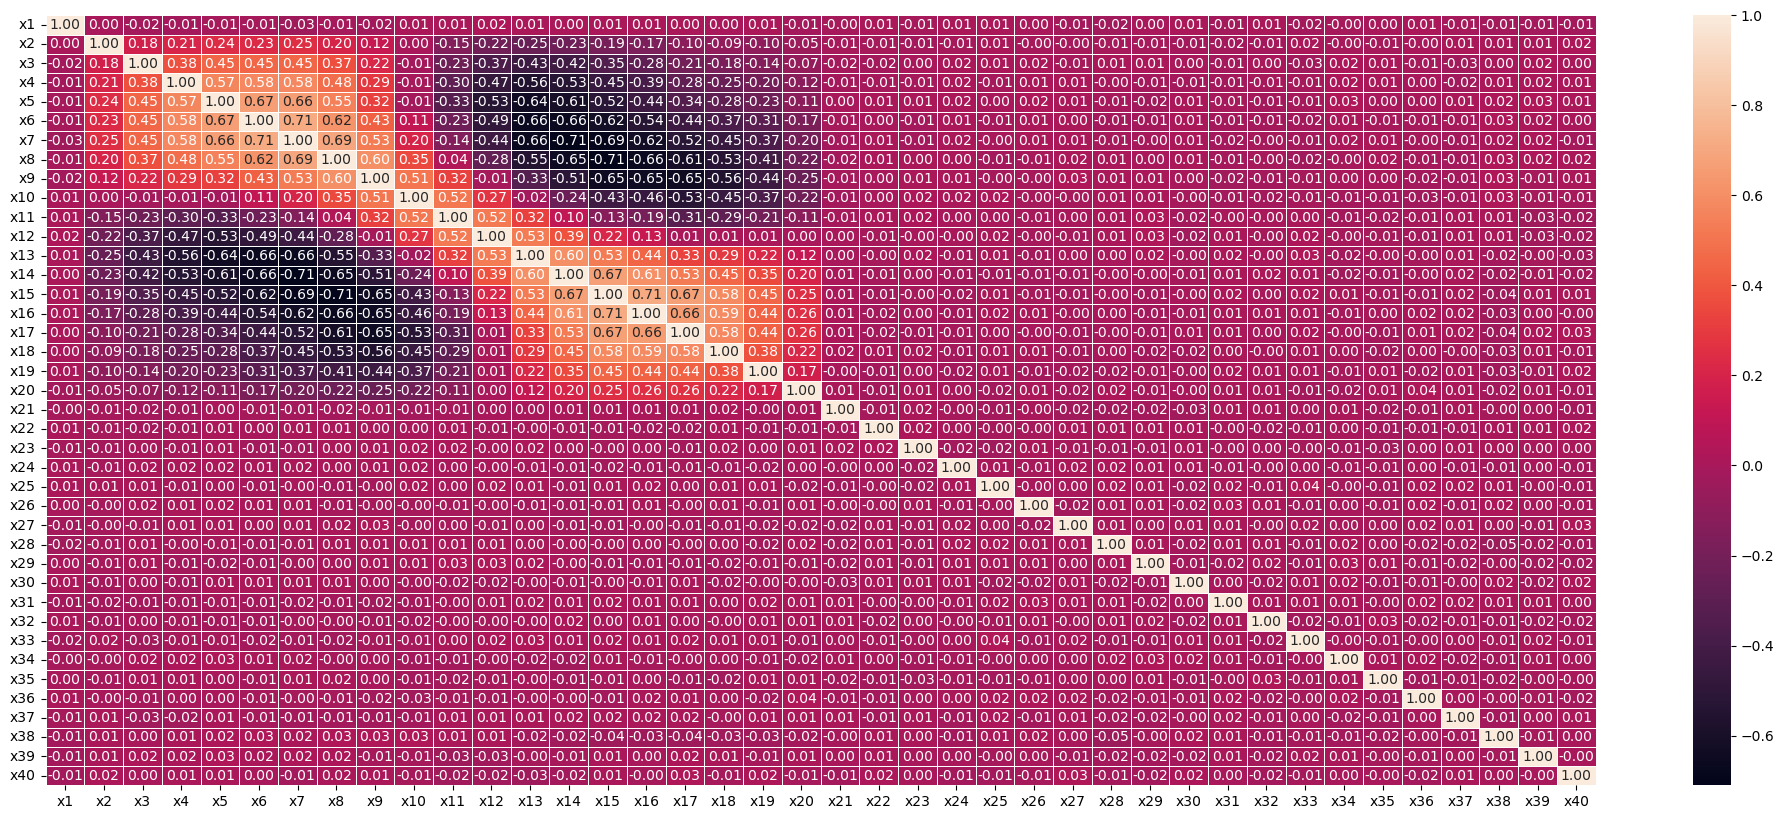

In [29]:
plt.figure(figsize=(25, 10))
plot = sn.heatmap(correlationPearsonComplete, annot=True, fmt=".2f", linewidths=.6)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X_std = StandardScaler().fit_transform(X)
print(X_std)
print(X_std.shape)

[[-0.21117062 -1.47903857  0.46648857 ...  0.57335191 -0.51976075
   0.26335531]
 [-0.67058458  0.64877525  0.36469    ... -0.07950605 -1.31153883
   0.97142837]
 [ 0.41802675  0.34067551 -0.32245038 ...  1.36682542 -1.60845562
   0.07387097]
 ...
 [-0.5906865  -1.53680727  0.23744178 ...  1.02533049 -1.62825007
   0.16362671]
 [-0.50080116  0.53323784  0.35620678 ... -0.79262781 -0.32181622
  -0.16547767]
 [ 0.27820511 -1.33461682  2.09526576 ... -1.00355115  0.73718697
   1.47007137]]
(5000, 40)


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca90 = PCA(n_components=0.90, whiten=True)
X_std_pca90 = pca90.fit_transform(X_std)

print(X_std_pca90)
print(X_std_pca90.shape)

[[-1.1771903  -1.05933705 -0.40105949 ... -1.2996427   0.36064847
   1.09049024]
 [ 1.20020538 -0.21087288  0.20611602 ...  0.33664855  1.16408846
  -0.26770933]
 [-1.41292441 -0.71604805  0.35494015 ...  0.18722716 -2.29623796
   0.36319805]
 ...
 [-1.05352223  0.23446622  0.37057361 ...  0.67790971 -0.58031205
  -0.106569  ]
 [-1.02046681 -0.6505428   0.02544289 ...  0.91871177 -1.1328323
   0.16672217]
 [-1.06563294  0.13184591  0.56773611 ... -3.32131858 -0.15920337
  -0.63302101]]
(5000, 29)


In [34]:
df1 = pd.DataFrame(X_std_pca90)
df1.to_csv("data/Waveform/PCA90.csv", index=False)

In [35]:
pca10 = PCA(n_components=10, whiten=True)
X_std_pca10 = pca10.fit_transform(X_std)

print(X_std_pca10)
print(X_std_pca10.shape)

[[-1.1771903  -1.05933705 -0.40105949 ...  0.38708093  0.21147754
   0.19875349]
 [ 1.20020538 -0.21087288  0.20611602 ... -0.52424886 -0.72760779
   0.75669719]
 [-1.41292441 -0.71604805  0.35494015 ... -0.57846108 -2.06655282
  -1.27672565]
 ...
 [-1.05352223  0.23446622  0.37057361 ... -0.76643785  1.77768744
   0.40460599]
 [-1.02046681 -0.6505428   0.02544289 ... -0.13795747  0.59297967
   0.23382601]
 [-1.06563294  0.13184591  0.56773611 ... -0.27070497 -0.50398785
   1.42324618]]
(5000, 10)


In [36]:
df1 = pd.DataFrame(X_std_pca10)
df1.to_csv("data/Waveform/PCA10.csv", index=False)